In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm


In [48]:
# dataset load
data = pd.read_csv("/home/dataset/complete.csv")
data_only_pm25 = pd.DataFrame(data.loc[:, ["PM-2.5", "일시"]])
data_only_pm25["일시"] = pd.to_datetime(data_only_pm25["일시"])
data_only_pm25.index = data_only_pm25["일시"]
del data_only_pm25["일시"]
data_only_pm25.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2029 entries, 2018-02-01 to 2023-08-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM-2.5  2029 non-null   float64
dtypes: float64(1)
memory usage: 31.7 KB


In [50]:
data_only_pm25.index

DatetimeIndex(['2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04',
               '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08',
               '2018-02-09', '2018-02-10',
               ...
               '2023-08-22', '2023-08-23', '2023-08-24', '2023-08-25',
               '2023-08-26', '2023-08-27', '2023-08-28', '2023-08-29',
               '2023-08-30', '2023-08-31'],
              dtype='datetime64[ns]', name='일시', length=2029, freq=None)

In [22]:
# dataset load
data = pd.read_csv("/home/dataset/complete.csv")
data_only_pm25 = pd.DataFrame(data.loc[:, ["PM-2.5", "일시"]])
data_only_pm25.index = data_only_pm25["일시"]
del data_only_pm25["일시"]
data = data_only_pm25

In [52]:
data = data_only_pm25
data

,PM-2.5
일시,
2018-02-01,15.0
2018-02-02,24.0
2018-02-03,12.0
2018-02-04,14.0
2018-02-05,9.0
...,...
2023-08-27,17.0
2023-08-28,7.0
2023-08-29,7.0


/home/estsoft/miniconda3/envs/wassup/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/estsoft/miniconda3/envs/wassup/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


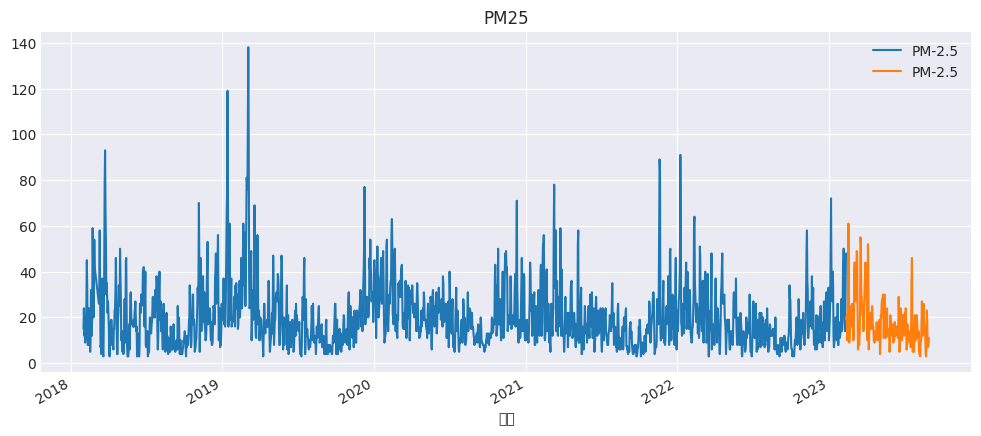

In [82]:
import datetime
tst_size = 200
trn, tst = data[:-tst_size], data[-tst_size:]

ax = trn.plot(title="PM25", label='trn', figsize=(12,5))
ax = tst.plot(label='tst', ax=ax)

plt.legend()
plt.show()

In [83]:
res_dict = {}

ADF Statistic: -6.987395685019742
p-value: 7.903929799841826e-10
Critical Values:
	1%: -3.4339580289794225
	5%: -2.8631337437669275
	10%: -2.567618456010139


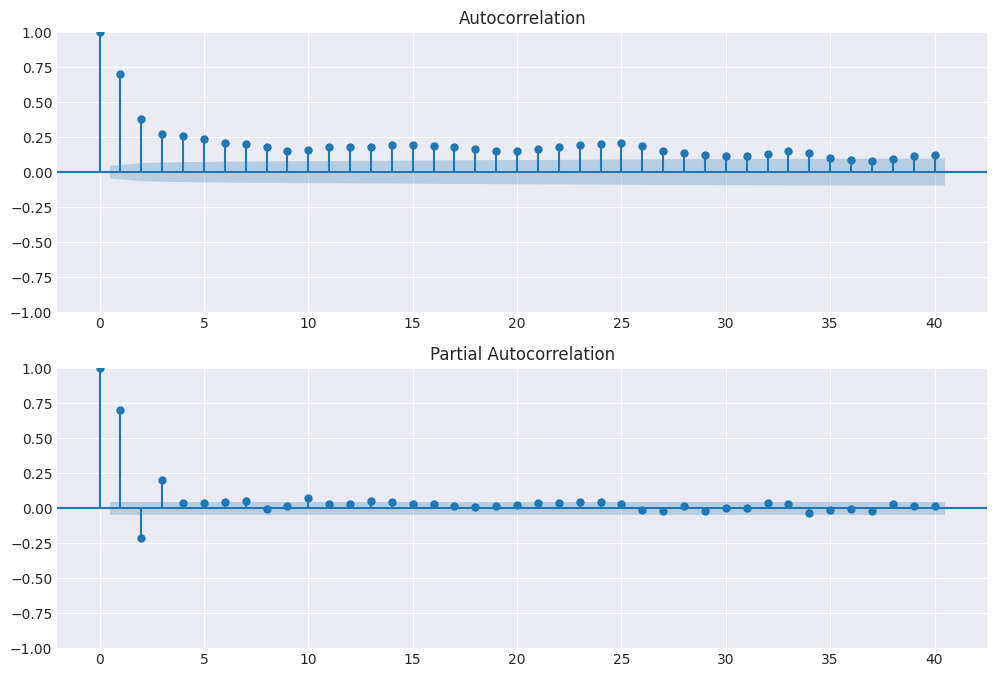

In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(trn.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(trn.values.squeeze(), lags=40, ax=ax2)

adf = adfuller(trn)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
  print('\t{}: {}'.format(key, value))
  
# p-value: 7.903929799841826e-10 -> stationary process

In [85]:
def mape(y_pred, y_true):
  return (np.abs(y_pred - y_true)/y_true).mean() * 100

def mae(y_pred, y_true):
  return np.abs(y_pred - y_true).mean()

In [87]:
from statsmodels.tsa.arima.model import ARIMA

trn, tst = data[:-tst_size], data[-tst_size:]
arma_mod90 = ARIMA(trn, order=(3,0,0)).fit() # AR(9)

/home/estsoft/miniconda3/envs/wassup/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/estsoft/miniconda3/envs/wassup/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/estsoft/miniconda3/envs/wassup/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [80]:
data.index

DatetimeIndex(['2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04',
               '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08',
               '2018-02-09', '2018-02-10',
               ...
               '2023-08-22', '2023-08-23', '2023-08-24', '2023-08-25',
               '2023-08-26', '2023-08-27', '2023-08-28', '2023-08-29',
               '2023-08-30', '2023-08-31'],
              dtype='datetime64[ns]', name='일시', length=2029, freq=None)

In [90]:
from datetime import datetime
start_date = datetime(2023,2,13)
end_date = datetime(2023,8,31)
# start_date = pd.Timestamp("2023-02-13")
# end_date = pd.Timestamp("2023-08-31")

prd = arma_mod90.predict(start_date, end_date, dynamic=True)
print(prd)
plt.title(f"AR(9), MAPE:{mape(prd, tst):.4f}, MAE:{mae(prd, tst):.4f}")
tst.plot(label="Target")
prd.plot(label=f"Prediction")
plt.legend()
plt.show()

res_dict.update({'AR(9)': {'MAPE':mape(prd,tst), 'MAE':mae(prd,tst)}})

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'